#Pregunta de investigación
¿Cómo ha sido el comportamiento de las ventas de tacos entre 2024 y 2025 y qué factores influyen más en los ingresos, la sastifacción del cliente y la eficiencia de entregas?

##Objetivos del análisis
1. Analizar el rendimiento general de ventas
 - Determinar el volumen total de ventas y su evolución en el tiempo.
 - Identificar los meses o temporadas con mayor o menor facturación.
2. Identificar los productos más rentables
 - Detectar los tipos de tacos o combinaciones más vendidos y los que generan más ingresos.
 - Relacionar ingredientes y toppings en el precio.
3. Evaluar el comportamiento de los clientes
 - Medir la frecuencia de compra por cliente (si aplica).
 - Calcular la propina promedio y su relación con el pedido.
4. Estudiar la eficiencia de entregas
 - Analizar el tiempo promedio de entrega.
 - Ver si existen diferencias según ubicación o método de entrega.
5. Explorar patrones temporales
 - Comprobar variaciones por día de la semana u hora del día.
 - Identificar posibles patrones de comportamiento estacional.
6. Generar insights accionables
 - Proponer recomendaciones para mejorar las ventas, fidelizar clientes o hacer más eficientes las entregas.

## Limpieza y transformación de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
taco_sales = pd.read_csv('taco_sales_(2024-2025).csv')
taco_sales

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,27-05-2024 11:12,27-05-2024 12:11,59,Large,Veggie Taco,2,20.04,7.00,2.80,False
996,232442,The Taco Stand,San Antonio,03-04-2025 20:51,03-04-2025 21:29,38,Regular,Fish Taco,0,13.69,3.00,1.38,False
997,251729,Urban Tacos,Houston,23-01-2025 05:33,23-01-2025 06:41,68,Regular,Pork Taco,2,4.07,5.50,2.00,False
998,940215,Taco Fiesta,San Antonio,05-09-2024 15:49,05-09-2024 16:38,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False


In [2]:
taco_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [3]:
taco_sales.columns = taco_sales.columns.str.strip().str.replace(' ', '_', regex=True).str.lower()
columnas_fecha = ['order_time', 'delivery_time']
def transformar_fechas(df, columnas):
  for col in columnas:
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y %H:%M')
transformar_fechas(taco_sales, columnas_fecha)
taco_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 1000 non-null   int64         
 1   restaurant_name          1000 non-null   object        
 2   location                 1000 non-null   object        
 3   order_time               1000 non-null   datetime64[ns]
 4   delivery_time            1000 non-null   datetime64[ns]
 5   delivery_duration_(min)  1000 non-null   int64         
 6   taco_size                1000 non-null   object        
 7   taco_type                1000 non-null   object        
 8   toppings_count           1000 non-null   int64         
 9   distance_(km)            1000 non-null   float64       
 10  price_($)                1000 non-null   float64       
 11  tip_($)                  1000 non-null   float64       
 12  weekend_order            1000 non-n

In [4]:
taco_sales['year_month'] = taco_sales['order_time'].dt.strftime('%Y-%m')
taco_sales

,order_id,restaurant_name,location,order_time,delivery_time,delivery_duration_(min),taco_size,taco_type,toppings_count,distance_(km),price_($),tip_($),weekend_order,year_month
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,2024-05-27 12:11:00,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,2024-05
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,2025-04-03 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,2025-04
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,2025-01-23 06:41:00,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,2025-01
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,2024-09-05 16:38:00,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,2024-09


##Analizar el rendimiento general de ventas

###Resumen general

In [5]:
#Resumen general
resumen = {
    'Total de pedidos': taco_sales.shape[0],
    'Ventas_totales ($)': round(taco_sales['price_($)'].sum(), 2),
    'Precio promedio por pedido ($)': round(taco_sales['price_($)'].mean(), 2),
    'Fecha más antigua': taco_sales['order_time'].min(),
    'Fecha más reciente': taco_sales['order_time'].max(),
    'Cantidad de restaurantes': taco_sales['restaurant_name'].nunique(),
    'Ubicaciones únicas': taco_sales['location'].nunique()
}
for key, value in resumen.items():
  print(f'{key}: {value}')

Total de pedidos: 1000
Ventas_totales ($): 6908.25
Precio promedio por pedido ($): 6.91
Fecha más antigua: 2024-01-01 18:39:00
Fecha más reciente: 2025-05-24 14:57:00
Cantidad de restaurantes: 10
Ubicaciones únicas: 10


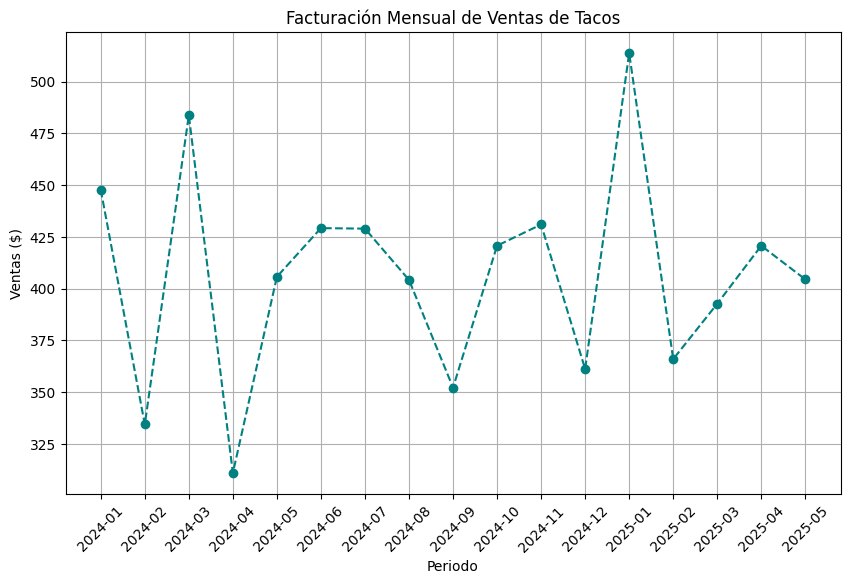

In [6]:
#Facturacion mensual
def graficar_facturacion_periodo(df, tipo):
  if tipo == 'mensual':
    df['periodo'] = df['order_time'].dt.to_period('M')
    titulo = "Facturación Mensual de Ventas de Tacos"
  elif tipo == 'trimestral':
    df['periodo'] = df['order_time'].dt.to_period('Q')
    titulo = "Facturación Trimestral de Ventas de Tacos"
  else:
    raise ValueError("El tipo debe ser mensual o trimestral")
  facturacion_mensual = df.groupby('periodo')['price_($)'].sum().reset_index()
  facturacion_mensual['periodo'] = facturacion_mensual['periodo'].astype(str)
  plt.figure(figsize=(10, 6))
  plt.plot(facturacion_mensual['periodo'], facturacion_mensual['price_($)'], marker='o', linestyle='--', color='teal')
  plt.title(titulo)
  plt.xlabel('Periodo')
  plt.ylabel('Ventas ($)')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()
graficar_facturacion_periodo(taco_sales, 'mensual')

###SubTemas del primer objetivo

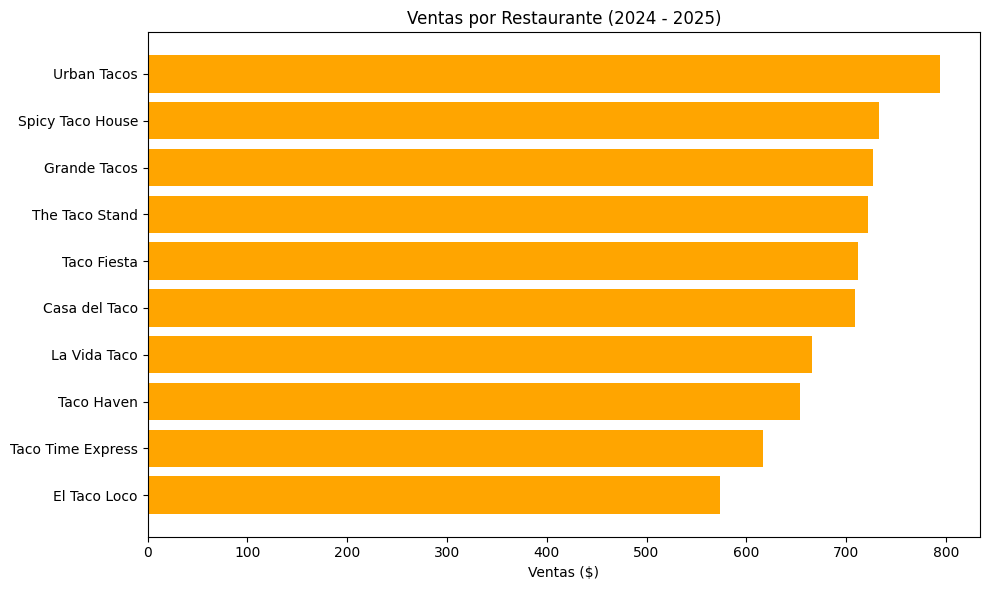

In [7]:
# Ventas por restaurante
def graficar_ventas_por_restaurante(df):
  ventas_por_restaurante = df.groupby('restaurant_name')['price_($)'].sum().sort_values(ascending = False).reset_index()
  plt.figure(figsize=(10, 6))
  plt.barh(ventas_por_restaurante['restaurant_name'], ventas_por_restaurante['price_($)'], color = 'orange')
  plt.xlabel('Ventas ($)')
  plt.title('Ventas por Restaurante (2024 - 2025)')
  plt.gca().invert_yaxis()
  plt.tight_layout()
  plt.show()
graficar_ventas_por_restaurante(taco_sales)

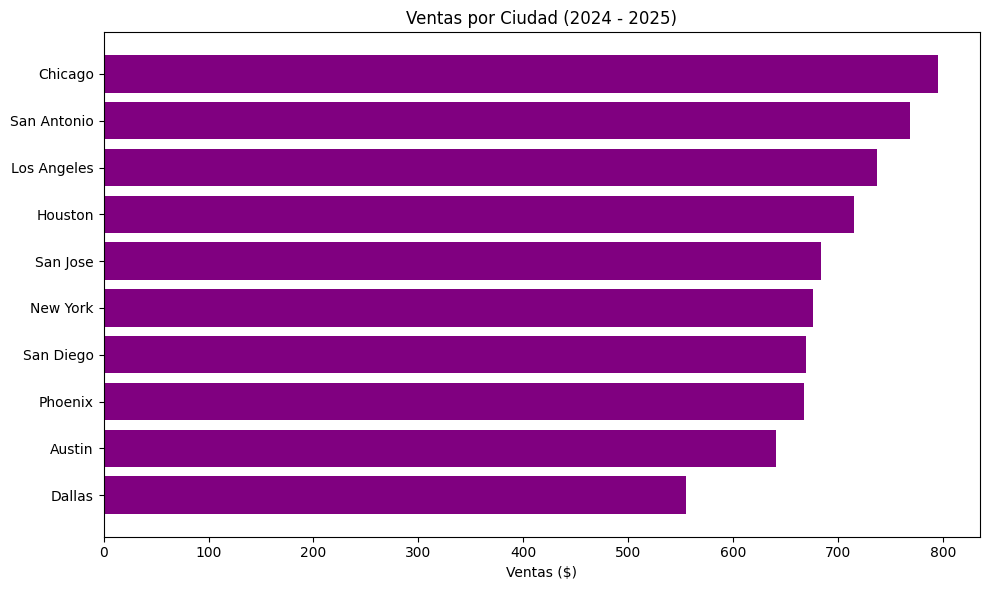

In [8]:
# Ventas por ciudad
def graficar_ventas_por_ciudad(df):
  ventas_por_ciudad = df.groupby('location')['price_($)'].sum().sort_values(ascending=False).reset_index()
  plt.figure(figsize=(10, 6))
  plt.barh(ventas_por_ciudad['location'], ventas_por_ciudad['price_($)'], color='purple')
  plt.xlabel('Ventas ($)')
  plt.title('Ventas por Ciudad (2024 - 2025)')
  plt.gca().invert_yaxis()
  plt.tight_layout()
  plt.show()
graficar_ventas_por_ciudad(taco_sales)

##Identificar productos más rentables

###Tipo de taco

In [9]:
# Cantidad de pedidos por tipo de taco
pedidos_por_taco = taco_sales['taco_type'].value_counts().reset_index()
pedidos_por_taco.columns = ['taco_type', 'cantidad_pedidos']
pedidos_por_taco

,taco_type,cantidad_pedidos
0,Chicken Taco,218
1,Fish Taco,211
2,Veggie Taco,197
3,Pork Taco,192
4,Beef Taco,182


In [10]:
# Ingresos por tipo de taco
ingresos_por_taco = taco_sales.groupby('taco_type')['price_($)'].sum().reset_index()
ingresos_por_taco.columns = ['taco_type', 'ingresos']
ingresos_por_taco

,taco_type,ingresos
0,Beef Taco,1197.75
1,Chicken Taco,1553.25
2,Fish Taco,1453.50
3,Pork Taco,1347.00
4,Veggie Taco,1356.75


In [11]:
# Combinamos ambos resultados
analisis_tipo_taco = pd.merge(pedidos_por_taco, ingresos_por_taco, on='taco_type')
analisis_tipo_taco = analisis_tipo_taco.sort_values(by='ingresos', ascending=False).reset_index(drop=True)
analisis_tipo_taco

,taco_type,cantidad_pedidos,ingresos
0,Chicken Taco,218,1553.25
1,Fish Taco,211,1453.50
2,Veggie Taco,197,1356.75
3,Pork Taco,192,1347.00
4,Beef Taco,182,1197.75


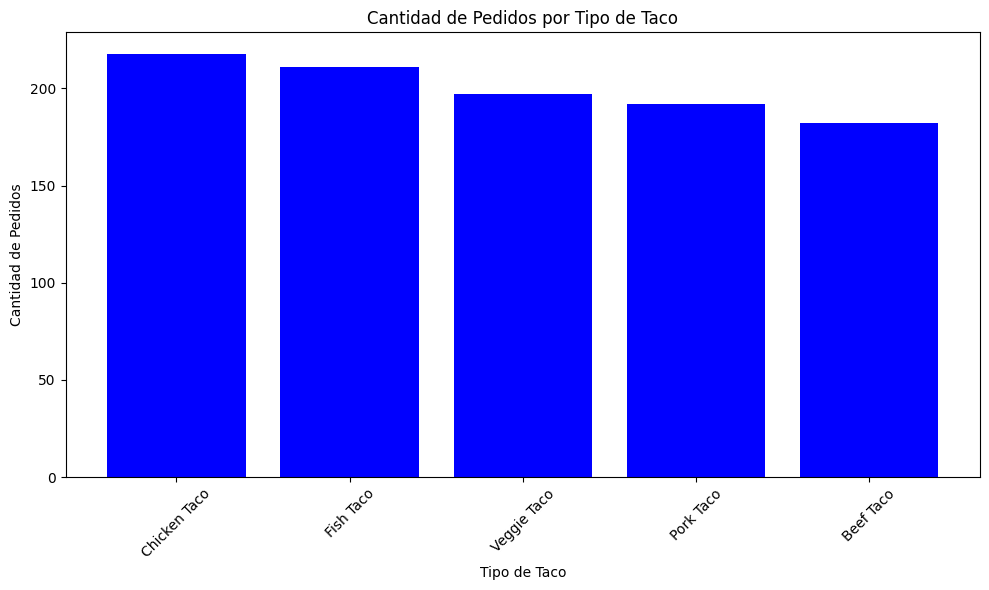

In [12]:
# Grafico de cantidad de pedidos por tipo de taco
def graficas_pedidos_por_taco(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['taco_type'], df['cantidad_pedidos'], color = 'blue')
  plt.title('Cantidad de Pedidos por Tipo de Taco')
  plt.xlabel('Tipo de Taco')
  plt.ylabel('Cantidad de Pedidos')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
graficas_pedidos_por_taco(analisis_tipo_taco)

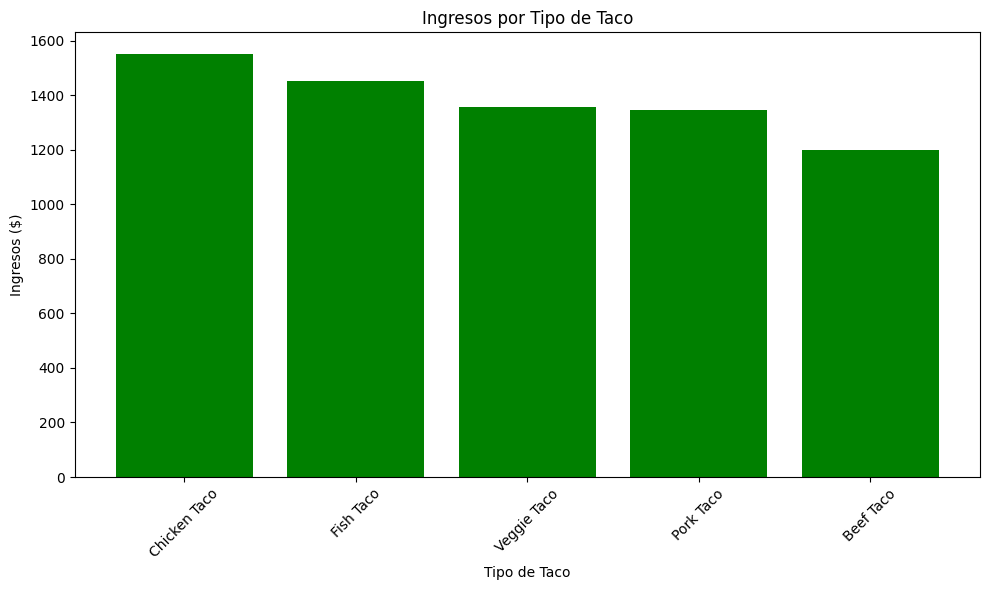

In [13]:
# Grafico de ingresos por tipo de taco
def graficar_ingresos_por_taco(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['taco_type'], df['ingresos'], color = 'green')
  plt.title('Ingresos por Tipo de Taco')
  plt.xlabel('Tipo de Taco')
  plt.ylabel('Ingresos ($)')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
graficar_ingresos_por_taco(analisis_tipo_taco)

###Tamaño de taco

In [14]:
# Cantidad de pedidos por tamaño de taco
cantidad_por_tamano = taco_sales['taco_size'].value_counts().reset_index()
cantidad_por_tamano.columns = ['taco_size', 'cantidad_pedidos']

# Ingresos por tamaño de taco
ingresos_por_tamano = taco_sales.groupby('taco_size')['price_($)'].sum().reset_index()
ingresos_por_tamano.columns = ['taco_size', 'ingresos']

# Combinamos ambos resultados
analisis_tamano_taco = pd.merge(cantidad_por_tamano, ingresos_por_tamano, on='taco_size')
analisis_tamano_taco = analisis_tamano_taco.sort_values(by='ingresos', ascending=False).reset_index(drop=True)
analisis_tamano_taco

,taco_size,cantidad_pedidos,ingresos
0,Large,498,3871.00
1,Regular,502,3037.25


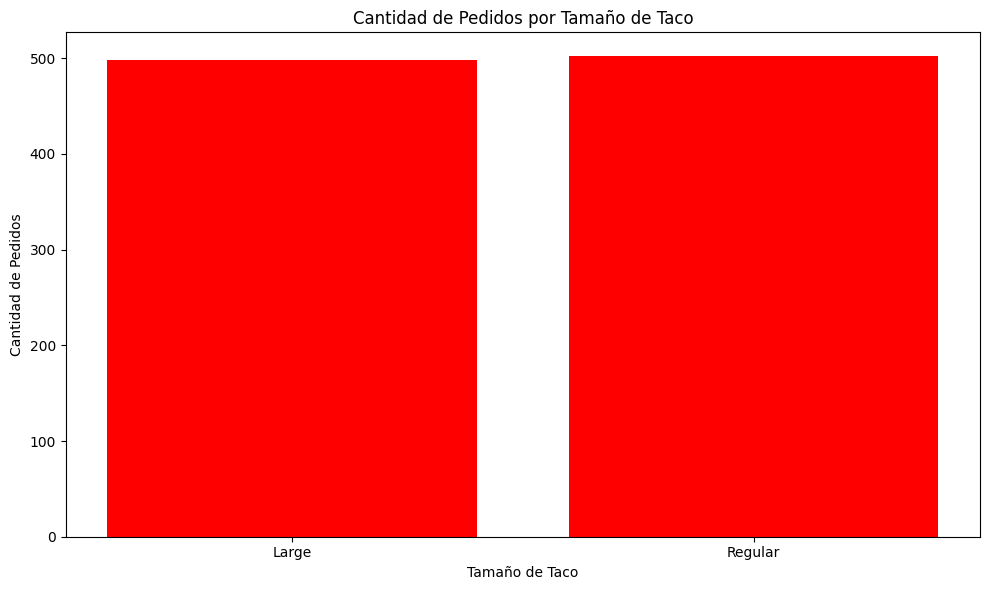

In [15]:
# Grafico de cantidad de pedidos por tamaño de taco
def graficar_pedidos_tamano(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['taco_size'], df['cantidad_pedidos'], color = 'red')
  plt.title('Cantidad de Pedidos por Tamaño de Taco')
  plt.xlabel('Tamaño de Taco')
  plt.ylabel('Cantidad de Pedidos')
  plt.tight_layout()
  plt.show()
graficar_pedidos_tamano(analisis_tamano_taco)

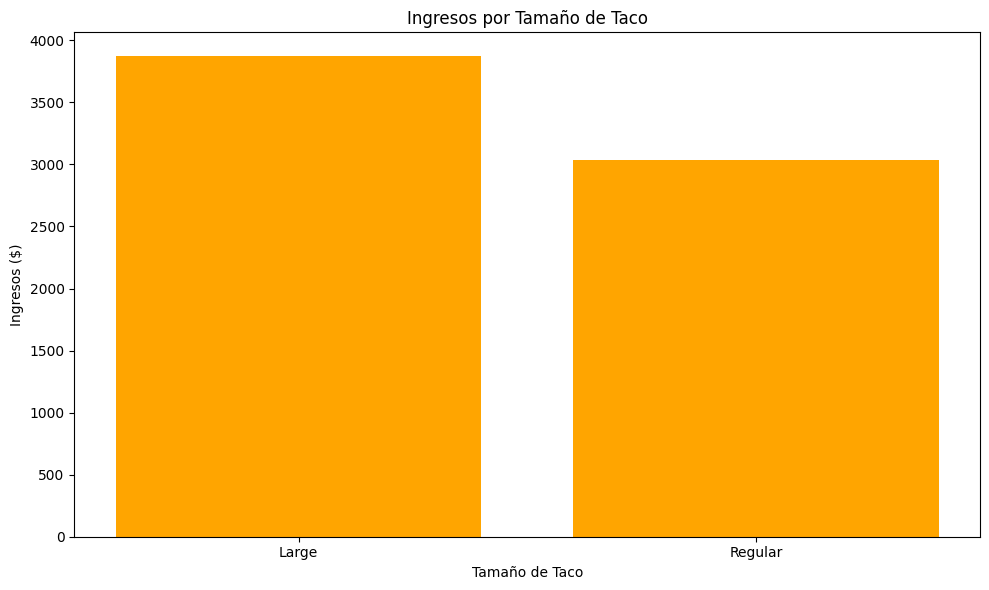

In [16]:
# Grafico de ingresos por tamaño de taco
def graficar_ingresos_tamano(df):
  plt.figure(figsize = (10, 6))
  plt.bar(df['taco_size'], df['ingresos'], color = 'orange')
  plt.title('Ingresos por Tamaño de Taco')
  plt.xlabel('Tamaño de Taco')
  plt.ylabel('Ingresos ($)')
  plt.tight_layout()
  plt.show()
graficar_ingresos_tamano(analisis_tamano_taco)

###Número de Toppings

In [17]:
# Frecuencia de cantidad de toppings
frecuencia_toppings = taco_sales['toppings_count'].value_counts().sort_index().reset_index()
frecuencia_toppings.columns = ['toppings_count', 'frecuencia']
frecuencia_toppings

,toppings_count,frecuencia
0,0,169
1,1,158
2,2,159
3,3,175
4,4,167
5,5,172


In [18]:
# Precio promedio por cantidad de toppings
precio_promedio_toppings = taco_sales.groupby('toppings_count')['price_($)'].mean().reset_index()
precio_promedio_toppings.columns = ['toppings_count', 'precio_promedio']
precio_promedio_toppings

,toppings_count,precio_promedio
0,0,3.754438
1,1,4.952532
2,2,6.160377
3,3,7.452857
4,4,8.817365
5,5,10.087209


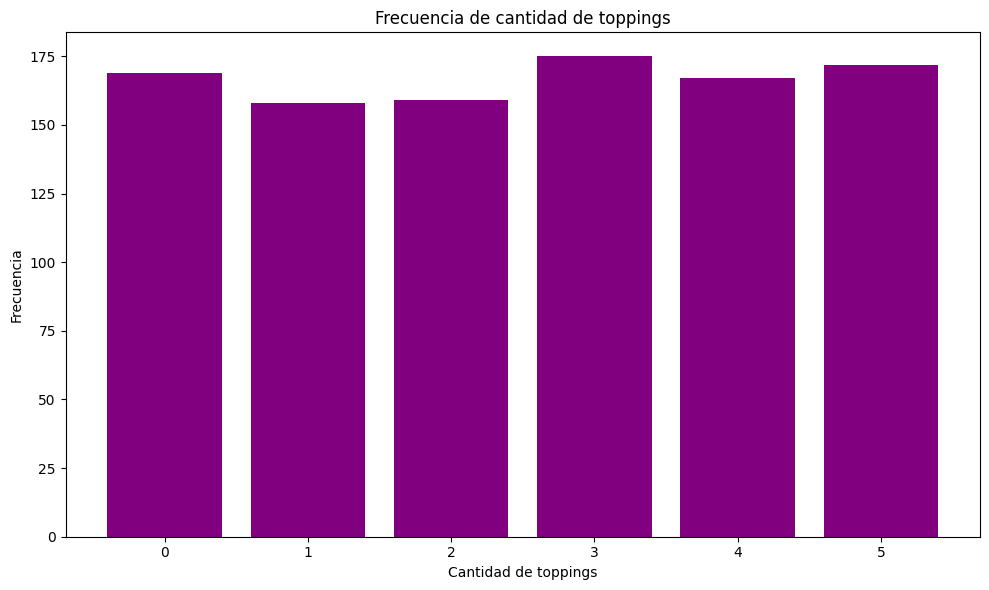

In [19]:
# Grafico de frecuencia de toppings
def graficar_frecuencia_toppings(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['toppings_count'], df['frecuencia'], color = 'purple')
  plt.title('Frecuencia de cantidad de toppings')
  plt.xlabel('Cantidad de toppings')
  plt.ylabel('Frecuencia')
  plt.tight_layout()
  plt.show()
graficar_frecuencia_toppings(frecuencia_toppings)

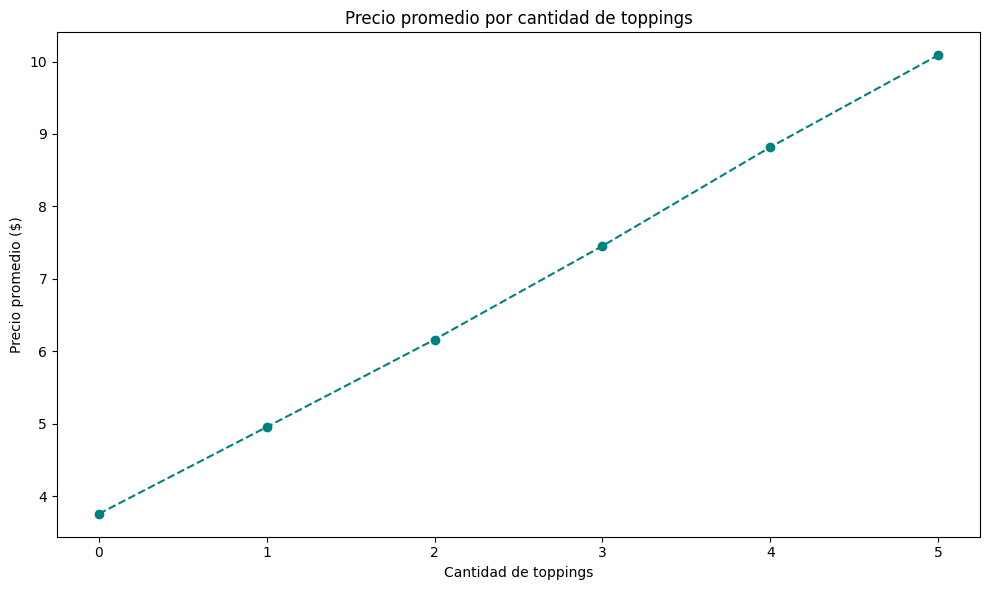

In [20]:
# Grafico de precio promedio por cantidad de toppings
def graficar_promedio_toppings(df):
  plt.figure(figsize=(10, 6))
  plt.plot(df['toppings_count'], df['precio_promedio'], marker='o', linestyle = '--', color = 'teal')
  plt.title('Precio promedio por cantidad de toppings')
  plt.xlabel('Cantidad de toppings')
  plt.ylabel('Precio promedio ($)')
  plt.tight_layout()
  plt.show()
graficar_promedio_toppings(precio_promedio_toppings)

##Evaluar el comportamiento de los clientes

In [21]:
# Propina promedio
propina_promedio = taco_sales["tip_($)"].mean()
print(f'Propina promedio: ${propina_promedio:.2f}')

Propina promedio: $1.81


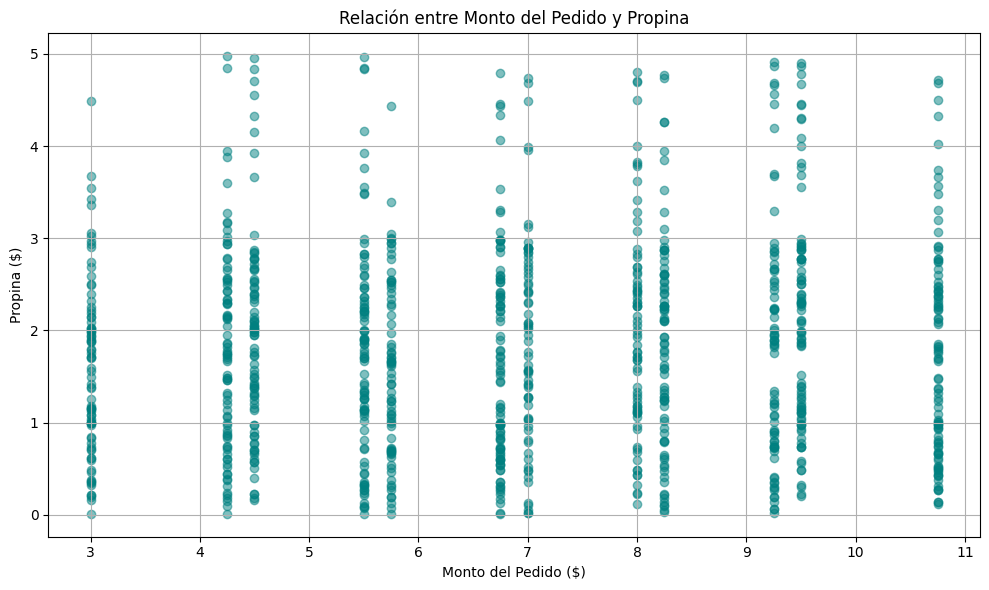

In [22]:
# Relación entre propina y monto del pedido
# Esto permite ver si los pedidos mas costosos tienden a recibir más propina
def graficar_propina_vs_monto(df):
  plt.figure(figsize=(10, 6))
  plt.scatter(df['price_($)'], df['tip_($)'], alpha=0.5, color='teal')
  plt.title('Relación entre Monto del Pedido y Propina')
  plt.xlabel('Monto del Pedido ($)')
  plt.ylabel('Propina ($)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()
graficar_propina_vs_monto(taco_sales)

In [23]:
# Propina promedio por día de la semana
taco_sales['dia_de_la_semana'] = taco_sales['order_time'].dt.day_name()
propia_dia = taco_sales.groupby('dia_de_la_semana')['tip_($)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()
propia_dia

,dia_de_la_semana,tip_($)
0,Monday,1.563413
1,Tuesday,1.468759
2,Wednesday,1.523758
3,Thursday,1.466328
4,Friday,1.598162
5,Saturday,2.508662
6,Sunday,2.584511


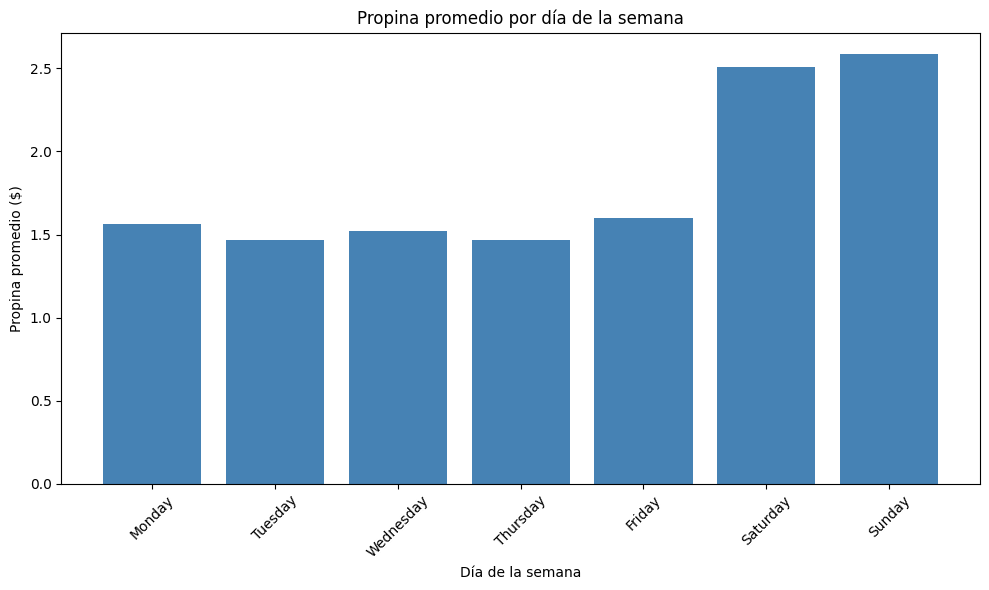

In [24]:
# Grafica de propina promedio por día de la semana
def graficar_propina_promedio_dia(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['dia_de_la_semana'], df['tip_($)'], color='steelblue')
  plt.title('Propina promedio por día de la semana')
  plt.xlabel('Día de la semana')
  plt.ylabel('Propina promedio ($)')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
graficar_propina_promedio_dia(propia_dia)

In [25]:
# Propina promedio por tipo de día (fin de semana o no)
propina_weekend = taco_sales.groupby('weekend_order')['tip_($)'].mean().reset_index()
propina_weekend['tipo_dia'] = propina_weekend['weekend_order'].map({True: "Fin de semana", False: "Día laboral"})
propina_weekend

,weekend_order,tip_($),tipo_dia
0,False,1.525710,Día laboral
1,True,2.545345,Fin de semana


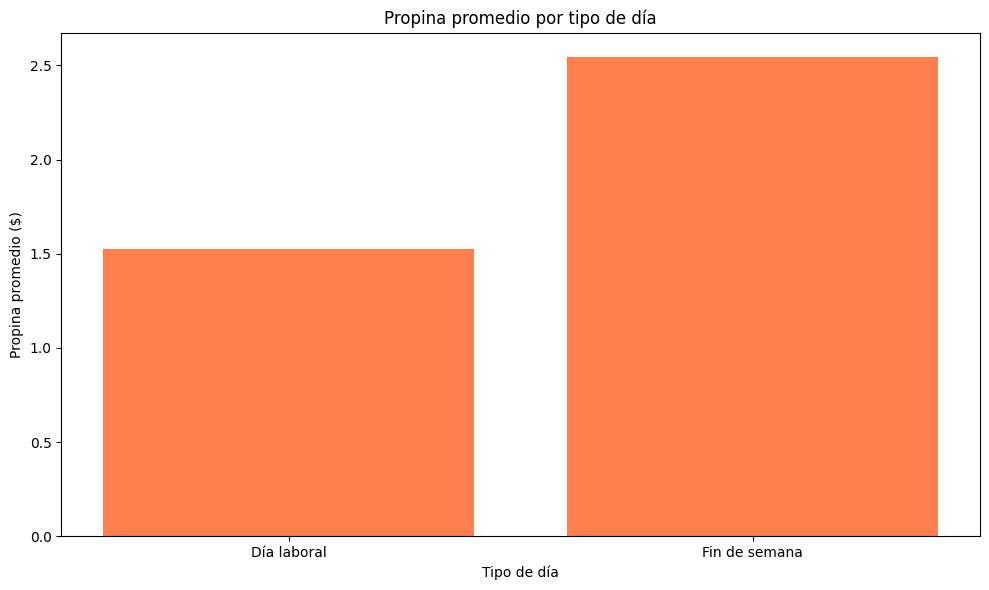

In [26]:
# Grafico de propina promedio por tipo de día
def graficar_propina_promedio_tipo_dia(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['tipo_dia'], df['tip_($)'], color='coral')
  plt.title('Propina promedio por tipo de día')
  plt.xlabel('Tipo de día')
  plt.ylabel('Propina promedio ($)')
  plt.tight_layout()
  plt.show()
graficar_propina_promedio_tipo_dia(propina_weekend)

##Estudiar la eficiencia de entregas

In [27]:
# Tiempo promedio de entrega
tiempo_promedio_entrega = taco_sales['delivery_duration_(min)'].mean()
print(f'Tiempo promedio de entrega: {tiempo_promedio_entrega:.2f} minutos')

Tiempo promedio de entrega: 50.93 minutos


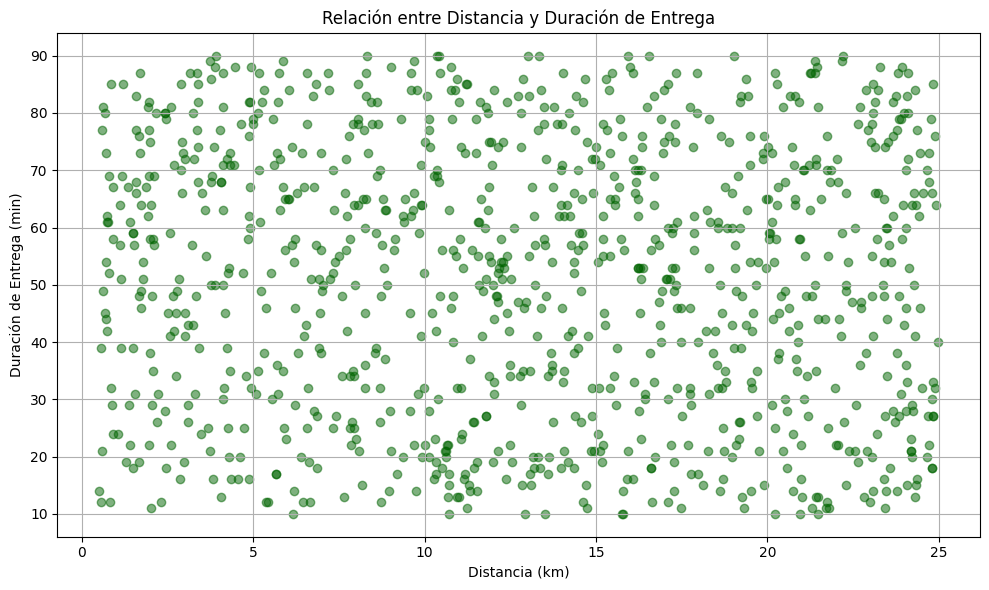

In [28]:
# Relación entre distancia y duración de entrega
def graficar_distancia_vs_duracion_entrega(df):
  plt.figure(figsize=(10, 6))
  plt.scatter(df['distance_(km)'], df['delivery_duration_(min)'], alpha=0.5, color='darkgreen')
  plt.title('Relación entre Distancia y Duración de Entrega')
  plt.xlabel('Distancia (km)')
  plt.ylabel('Duración de Entrega (min)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()
graficar_distancia_vs_duracion_entrega(taco_sales)

In [29]:
# Tiempo promedio según si es fin de semana
duracion_por_dia = taco_sales.groupby('weekend_order')['delivery_duration_(min)'].mean().reset_index()
duracion_por_dia['tipo_dia'] = duracion_por_dia['weekend_order'].map({True: "Fin de semana", False: "Día laboral"})
duracion_por_dia

,weekend_order,delivery_duration_(min),tipo_dia
0,False,51.537931,Día laboral
1,True,49.327273,Fin de semana


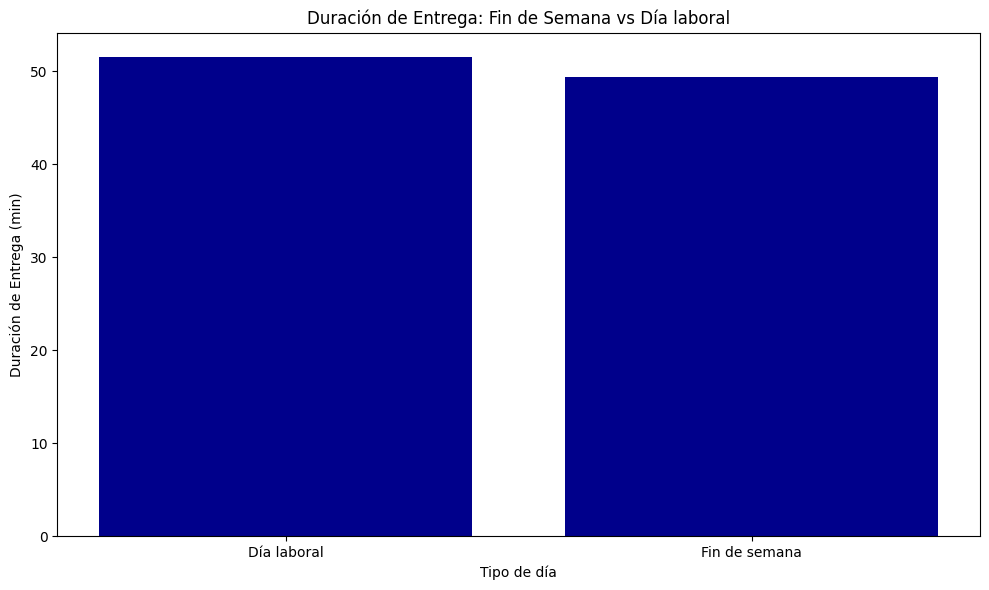

In [30]:
# Grafico de tiempo promedio según si es fin de semana
def graficar_tiempo_promedio_tipo_dia(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['tipo_dia'], df['delivery_duration_(min)'], color = 'darkblue')
  plt.title('Duración de Entrega: Fin de Semana vs Día laboral')
  plt.xlabel('Tipo de día')
  plt.ylabel('Duración de Entrega (min)')
  plt.tight_layout()
  plt.show()
graficar_tiempo_promedio_tipo_dia(duracion_por_dia)

##Explorar patrones temporales

In [31]:
taco_sales

,order_id,restaurant_name,location,order_time,delivery_time,delivery_duration_(min),taco_size,taco_type,toppings_count,distance_(km),price_($),tip_($),weekend_order,year_month,periodo,dia_de_la_semana
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08,2024-08,Thursday
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11,2024-11,Saturday
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11,2024-11,Thursday
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09,2024-09,Saturday
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07,2024-07,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,2024-05-27 12:11:00,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,2024-05,2024-05,Monday
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,2025-04-03 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,2025-04,2025-04,Thursday
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,2025-01-23 06:41:00,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,2025-01,2025-01,Thursday
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,2024-09-05 16:38:00,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,2024-09,2024-09,Thursday


In [32]:
taco_sales['hora'] = taco_sales['order_time'].dt.hour
taco_sales

,order_id,restaurant_name,location,order_time,delivery_time,delivery_duration_(min),taco_size,taco_type,toppings_count,distance_(km),price_($),tip_($),weekend_order,year_month,periodo,dia_de_la_semana,hora
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,2024-08-01 15:36:00,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08,2024-08,Thursday,14
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,2024-11-23 17:25:00,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11,2024-11,Saturday,17
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,2024-11-21 21:02:00,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11,2024-11,Thursday,20
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,2024-09-21 07:28:00,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09,2024-09,Saturday,6
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,2024-07-24 11:16:00,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07,2024-07,Wednesday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164891,La Vida Taco,Austin,2024-05-27 11:12:00,2024-05-27 12:11:00,59,Large,Veggie Taco,2,20.04,7.00,2.80,False,2024-05,2024-05,Monday,11
996,232442,The Taco Stand,San Antonio,2025-04-03 20:51:00,2025-04-03 21:29:00,38,Regular,Fish Taco,0,13.69,3.00,1.38,False,2025-04,2025-04,Thursday,20
997,251729,Urban Tacos,Houston,2025-01-23 05:33:00,2025-01-23 06:41:00,68,Regular,Pork Taco,2,4.07,5.50,2.00,False,2025-01,2025-01,Thursday,5
998,940215,Taco Fiesta,San Antonio,2024-09-05 15:49:00,2024-09-05 16:38:00,49,Regular,Veggie Taco,5,14.56,9.25,1.89,False,2024-09,2024-09,Thursday,15


In [33]:
# Pedidos por dia de la semana
pedidos_dia = taco_sales['dia_de_la_semana'].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()
pedidos_dia.columns = ['dia_de_la_semana', 'cantidad_pedidos']
pedidos_dia

,dia_de_la_semana,cantidad_pedidos
0,Monday,167
1,Tuesday,145
2,Wednesday,149
3,Thursday,128
4,Friday,136
5,Saturday,142
6,Sunday,133


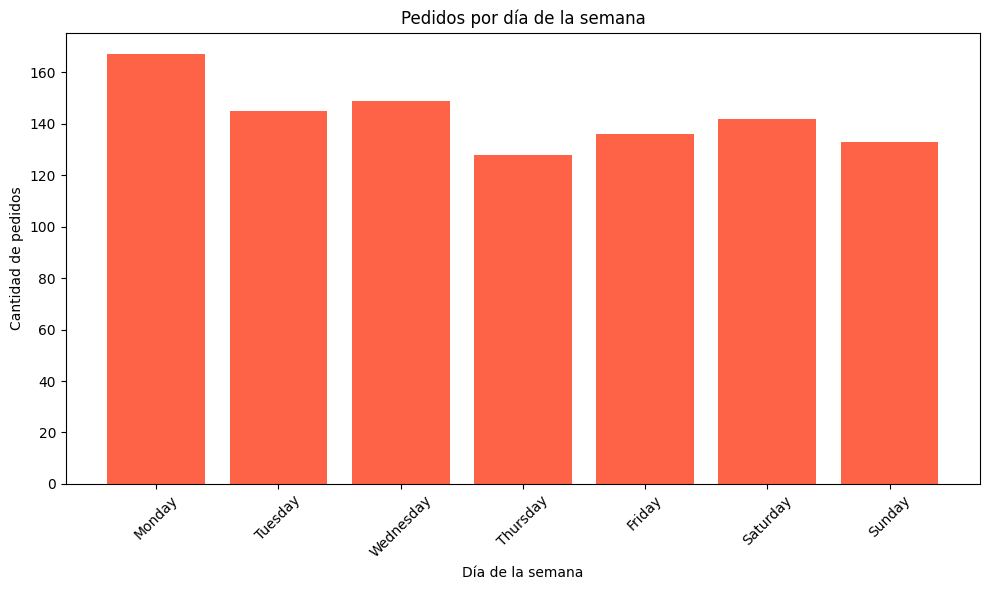

In [34]:
# Grafico de pedidos por dia de la semana
def graficar_pedidos_dia_semana(df):
  plt.figure(figsize=(10, 6))
  plt.bar(df['dia_de_la_semana'], df['cantidad_pedidos'], color = 'tomato')
  plt.title('Pedidos por día de la semana')
  plt.xlabel('Día de la semana')
  plt.ylabel('Cantidad de pedidos')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
graficar_pedidos_dia_semana(pedidos_dia)

In [35]:
# Pedidos por hora del día
pedidos_hora = taco_sales['hora'].value_counts().sort_index().reset_index()
pedidos_hora.columns = ['hora', 'cantidad_pedidos']
pedidos_hora

,hora,cantidad_pedidos
0,0,41
1,1,42
2,2,48
3,3,38
4,4,52
5,5,50
6,6,34
7,7,45
8,8,37
9,9,40


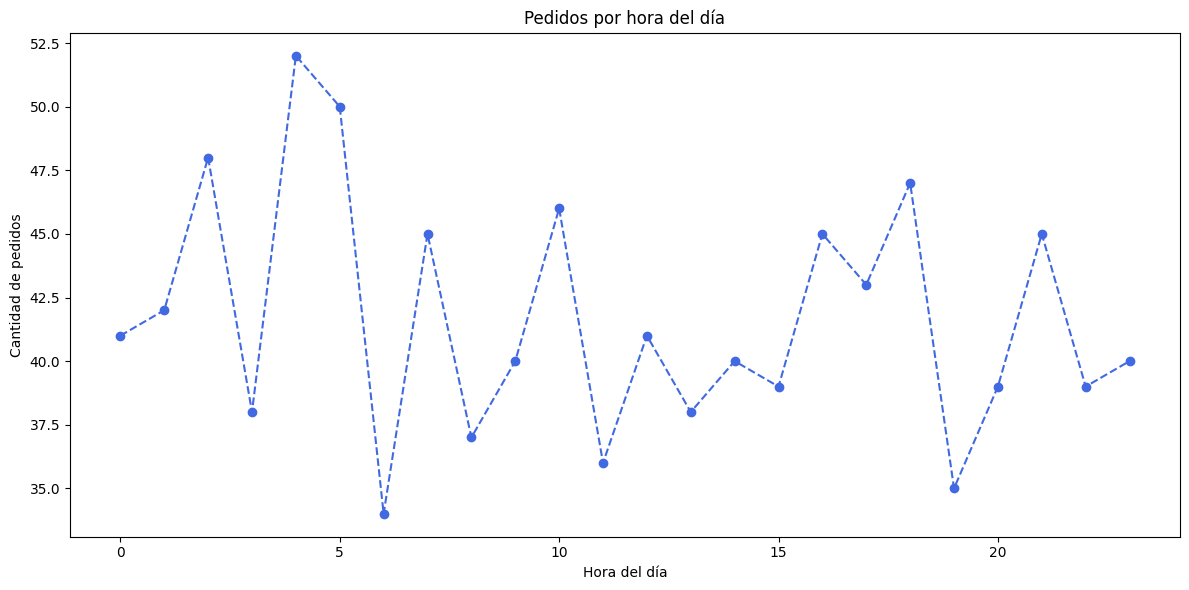

In [36]:
# Grafico de pedidos por hora del día
def graficar_pedidos_hora_dia(df):
  plt.figure(figsize=(12, 6))
  plt.plot(df['hora'], df['cantidad_pedidos'], marker='o', linestyle='--', color='royalblue')
  plt.title('Pedidos por hora del día')
  plt.xlabel('Hora del día')
  plt.ylabel('Cantidad de pedidos')
  plt.tight_layout()
  plt.show()
graficar_pedidos_hora_dia(pedidos_hora)